<a href="https://colab.research.google.com/github/KithminiP/Price_prediction/blob/main/offline_pricing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Paths to data CSVs
customer_data_path = "data/customer_data.csv"
claims_data_path   = "data/claims_data.csv"
policy_data_path   = "data/policy_data.csv"

In [3]:
# Read CSV files
customer_df = pd.read_csv(customer_data_path)
claims_df   = pd.read_csv(claims_data_path)
policy_df   = pd.read_csv(policy_data_path)

In [4]:
# Merge datasets on the common column (customer_id)
data = customer_df.merge(claims_df, on="customer_id").merge(policy_df, on="customer_id")

In [7]:
print(data.head())

   age  gender  driving_record  years_with_company  total_claims  \
0   56       1               0                  15             0   
1   69       1               2                   3             0   
2   46       0               0                   3             0   
3   32       0               0                   7             0   
4   60       0               1                   5             1   

   policy_premium  claim_ratio  
0      300.052451     0.000000  
1      535.934088     0.000000  
2      262.158275     0.000000  
3      281.171467     0.000000  
4      443.610339     0.166667  


In [5]:
# Create a new feature: claim_ratio.
# Adding 1 to 'years_with_company' to avoid division by zero.
data["claim_ratio"] = data["total_claims"] / (data["years_with_company"] + 1)

In [6]:
# Drop non-numeric or unnecessary columns
# In this example, drop 'customer_id' because it is an identifier.
data = data.drop(columns=["customer_id"])

In [8]:
# Define features (X) and target (y)
X = data.drop(columns=["policy_premium"])
y = data["policy_premium"]

In [10]:
# Standardize the features for better performance with many ML algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split into training and test sets for offline evaluation.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
#Train the Model
#XGBoost for regression.
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train);
print("Model training complete.")

Model training complete.


In [16]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

In [19]:
print("Pricing Model Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Pricing Model Evaluation:
Mean Absolute Error: 16.65
R² Score: 0.96


Mean Absolute Error (MAE): 16.65

This means that, on average, the model's predictions deviate from the actual insurance premiums by about 16.65 units. Depending on the scale of the premiums, this could be considered a very small error.

R² Score: 0.96

An R² score of 0.96 indicates that 96% of the variance in the insurance premium values is explained by the model. This suggests that the model has a very strong fit to the data.



Feature Importance Analysis

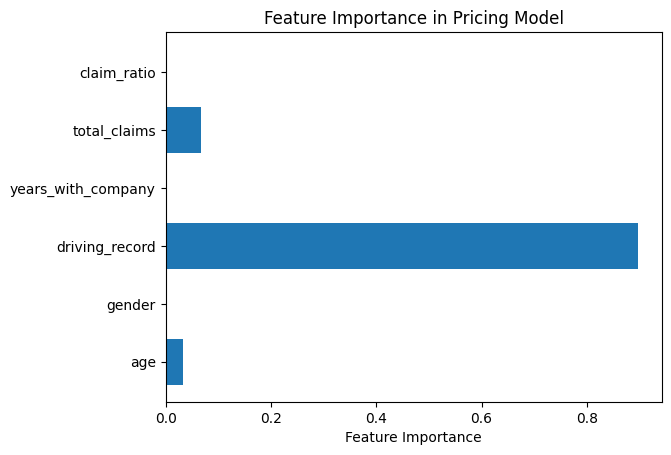

In [70]:
importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Pricing Model")
plt.show()